In [1]:
import pandas as pd
import numpy as np
import pickle
from sklearn.dummy import DummyRegressor
from sklearn import linear_model, ensemble
%matplotlib notebook

In [2]:
with open('df_features.pickle', 'rb') as fp:
    df = pickle.load(fp)
df_pre = df.copy()
df_pre

,Datum,Wochentag,Fahrweg,Fahrt,Fahrzeugnummer,Linienverlauf,SollAb,IstAb,GPS-Breite Soll,GPS-Länge Soll,Verspätung,Verspätung_total_seconds,Feiertag,Stunden,Temperatur (°C),Windstärke (km/h),Wetter
0,2016-10-10,Montag,4,1061896,1299,01 Roxel Hallenbad A,2016-10-10 05:16:00,2016-10-10 05:15:45,519544255.0,75273611.0,-1 days +23:59:45,-15.0,False,2016-10-10 05:00:00,6.0,7.0,wolkig
1,2016-10-10,Montag,2,1081890,5556,30 Ludgeriplatz B,2016-10-10 05:17:00,2016-10-10 05:17:58,519558997.0,76278508.0,00:00:58,58.0,False,2016-10-10 05:00:00,6.0,7.0,wolkig
2,2016-10-10,Montag,4,1061896,1299,03 Pienersallee,2016-10-10 05:19:00,2016-10-10 05:19:09,519511969.0,75300852.0,00:00:09,9.0,False,2016-10-10 05:00:00,6.0,7.0,wolkig
3,2016-10-10,Montag,2,1081890,5556,31 Goebenstr.,2016-10-10 05:19:00,2016-10-10 05:19:03,51952888.0,76254844.0,00:00:03,3.0,False,2016-10-10 05:00:00,6.0,7.0,wolkig
4,2016-10-10,Montag,4,1061896,1299,04 Stellmacherweg,2016-10-10 05:20:00,2016-10-10 05:20:16,519486219.0,75275802.0,00:00:16,16.0,False,2016-10-10 05:00:00,6.0,7.0,wolkig
5,2016-10-10,Montag,2,1081890,5556,32 St. Joseph-Kirche,2016-10-10 05:20:00,2016-10-10 05:20:00,519493516.0,76243561.0,00:00:00,0.0,False,2016-10-10 05:00:00,6.0,7.0,wolkig
6,2016-10-10,Montag,2,1081890,5556,33 Alter Sch¿tzenhof A,2016-10-10 05:21:00,2016-10-10 05:20:44,519460313.0,76232794.0,-1 days +23:59:44,-16.0,False,2016-10-10 05:00:00,6.0,7.0,wolkig
7,2016-10-10,Montag,4,1061896,1299,05 Roxel Bahnhof,2016-10-10 05:21:00,2016-10-10 05:21:13,519462505.0,75262616.0,00:00:13,13.0,False,2016-10-10 05:00:00,6.0,7.0,wolkig
8,2016-10-10,Montag,4,1061896,1299,06 Stellmacherweg,2016-10-10 05:22:00,2016-10-10 05:22:34,519485516.0,75277136.0,00:00:34,34.0,False,2016-10-10 05:00:00,6.0,7.0,wolkig
9,2016-10-10,Montag,2,1081890,5556,34 Metzer Str.,2016-10-10 05:23:00,2016-10-10 05:23:20,519422225.0,76234541.0,00:00:20,20.0,False,2016-10-10 05:00:00,6.0,7.0,wolkig


In [3]:
from sklearn import preprocessing
# Scaling numerical features to range [0, 1]
min_max_scaler = preprocessing.MinMaxScaler()
df_pre[['Temperatur (°C)', 'Windstärke (km/h)']] = min_max_scaler.fit_transform(
    df[['Temperatur (°C)', 'Windstärke (km/h)']]
)

In [4]:
# Endcode categorial variables as one-hot vectors.
df_pre = pd.concat([df_pre, pd.get_dummies(df_pre[['Wochentag', 'Wetter', 'Linienverlauf']])], axis=1)
df_pre

,Datum,Wochentag,Fahrweg,Fahrt,Fahrzeugnummer,Linienverlauf,SollAb,IstAb,GPS-Breite Soll,GPS-Länge Soll,...,Linienverlauf_49 Amelsb¿rener Str.,Linienverlauf_50 Sternkamp,Linienverlauf_51 Hansestr. A,Linienverlauf_52 Raringheide,Linienverlauf_53 Pater-Kolbe-Str.,Linienverlauf_54 Plutoweg,Linienverlauf_55 Amelsb¿ren Schule,Linienverlauf_56 Amelsb¿ren Kirche,Linienverlauf_57 Davertstr. B,Linienverlauf_58 Am Dornbusch
0,2016-10-10,Montag,4,1061896,1299,01 Roxel Hallenbad A,2016-10-10 05:16:00,2016-10-10 05:15:45,519544255.0,75273611.0,...,0,0,0,0,0,0,0,0,0,0
1,2016-10-10,Montag,2,1081890,5556,30 Ludgeriplatz B,2016-10-10 05:17:00,2016-10-10 05:17:58,519558997.0,76278508.0,...,0,0,0,0,0,0,0,0,0,0
2,2016-10-10,Montag,4,1061896,1299,03 Pienersallee,2016-10-10 05:19:00,2016-10-10 05:19:09,519511969.0,75300852.0,...,0,0,0,0,0,0,0,0,0,0
3,2016-10-10,Montag,2,1081890,5556,31 Goebenstr.,2016-10-10 05:19:00,2016-10-10 05:19:03,51952888.0,76254844.0,...,0,0,0,0,0,0,0,0,0,0
4,2016-10-10,Montag,4,1061896,1299,04 Stellmacherweg,2016-10-10 05:20:00,2016-10-10 05:20:16,519486219.0,75275802.0,...,0,0,0,0,0,0,0,0,0,0
5,2016-10-10,Montag,2,1081890,5556,32 St. Joseph-Kirche,2016-10-10 05:20:00,2016-10-10 05:20:00,519493516.0,76243561.0,...,0,0,0,0,0,0,0,0,0,0
6,2016-10-10,Montag,2,1081890,5556,33 Alter Sch¿tzenhof A,2016-10-10 05:21:00,2016-10-10 05:20:44,519460313.0,76232794.0,...,0,0,0,0,0,0,0,0,0,0
7,2016-10-10,Montag,4,1061896,1299,05 Roxel Bahnhof,2016-10-10 05:21:00,2016-10-10 05:21:13,519462505.0,75262616.0,...,0,0,0,0,0,0,0,0,0,0
8,2016-10-10,Montag,4,1061896,1299,06 Stellmacherweg,2016-10-10 05:22:00,2016-10-10 05:22:34,519485516.0,75277136.0,...,0,0,0,0,0,0,0,0,0,0
9,2016-10-10,Montag,2,1081890,5556,34 Metzer Str.,2016-10-10 05:23:00,2016-10-10 05:23:20,519422225.0,76234541.0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
df_pre['Haltestelle'] = df_pre['Linienverlauf'].apply(lambda x: x[:3]).apply(pd.to_numeric)

In [11]:
# Discard outliers.
df_pre = df_pre[df_pre["Verspätung_total_seconds"] > -1200]  #discard early departures of more than 20 minutes
df_pre = df_pre[df_pre["Verspätung_total_seconds"] < 3600]   #discard delays longer than an hour
df_pre

,Datum,Wochentag,Fahrweg,Fahrt,Fahrzeugnummer,Linienverlauf,SollAb,IstAb,GPS-Breite Soll,GPS-Länge Soll,...,Linienverlauf_50 Sternkamp,Linienverlauf_51 Hansestr. A,Linienverlauf_52 Raringheide,Linienverlauf_53 Pater-Kolbe-Str.,Linienverlauf_54 Plutoweg,Linienverlauf_55 Amelsb¿ren Schule,Linienverlauf_56 Amelsb¿ren Kirche,Linienverlauf_57 Davertstr. B,Linienverlauf_58 Am Dornbusch,Haltestelle
0,2016-10-10,Montag,4,1061896,1299,01 Roxel Hallenbad A,2016-10-10 05:16:00,2016-10-10 05:15:45,519544255.0,75273611.0,...,0,0,0,0,0,0,0,0,0,1
1,2016-10-10,Montag,2,1081890,5556,30 Ludgeriplatz B,2016-10-10 05:17:00,2016-10-10 05:17:58,519558997.0,76278508.0,...,0,0,0,0,0,0,0,0,0,30
2,2016-10-10,Montag,4,1061896,1299,03 Pienersallee,2016-10-10 05:19:00,2016-10-10 05:19:09,519511969.0,75300852.0,...,0,0,0,0,0,0,0,0,0,3
3,2016-10-10,Montag,2,1081890,5556,31 Goebenstr.,2016-10-10 05:19:00,2016-10-10 05:19:03,51952888.0,76254844.0,...,0,0,0,0,0,0,0,0,0,31
4,2016-10-10,Montag,4,1061896,1299,04 Stellmacherweg,2016-10-10 05:20:00,2016-10-10 05:20:16,519486219.0,75275802.0,...,0,0,0,0,0,0,0,0,0,4
5,2016-10-10,Montag,2,1081890,5556,32 St. Joseph-Kirche,2016-10-10 05:20:00,2016-10-10 05:20:00,519493516.0,76243561.0,...,0,0,0,0,0,0,0,0,0,32
6,2016-10-10,Montag,2,1081890,5556,33 Alter Sch¿tzenhof A,2016-10-10 05:21:00,2016-10-10 05:20:44,519460313.0,76232794.0,...,0,0,0,0,0,0,0,0,0,33
7,2016-10-10,Montag,4,1061896,1299,05 Roxel Bahnhof,2016-10-10 05:21:00,2016-10-10 05:21:13,519462505.0,75262616.0,...,0,0,0,0,0,0,0,0,0,5
8,2016-10-10,Montag,4,1061896,1299,06 Stellmacherweg,2016-10-10 05:22:00,2016-10-10 05:22:34,519485516.0,75277136.0,...,0,0,0,0,0,0,0,0,0,6
9,2016-10-10,Montag,2,1081890,5556,34 Metzer Str.,2016-10-10 05:23:00,2016-10-10 05:23:20,519422225.0,76234541.0,...,0,0,0,0,0,0,0,0,0,34


In [19]:
df_pre[pd.isnull(df_pre['Datum'])]

,Datum,Wochentag,Fahrweg,Fahrt,Fahrzeugnummer,Linienverlauf,SollAb,IstAb,GPS-Breite Soll,GPS-Länge Soll,...,Linienverlauf_51 Hansestr. A,Linienverlauf_52 Raringheide,Linienverlauf_53 Pater-Kolbe-Str.,Linienverlauf_54 Plutoweg,Linienverlauf_55 Amelsb¿ren Schule,Linienverlauf_56 Amelsb¿ren Kirche,Linienverlauf_57 Davertstr. B,Linienverlauf_58 Am Dornbusch,Haltestelle,month


In [26]:
# Add month as label. 
df_pre['month'] = df_pre['Datum'].apply(lambda x: x.month)
df_pre[['Datum', 'month']]

,Datum,month
0,2016-10-10,10
1,2016-10-10,10
2,2016-10-10,10
3,2016-10-10,10
4,2016-10-10,10
5,2016-10-10,10
6,2016-10-10,10
7,2016-10-10,10
8,2016-10-10,10
9,2016-10-10,10


<IPython.core.display.Javascript object>


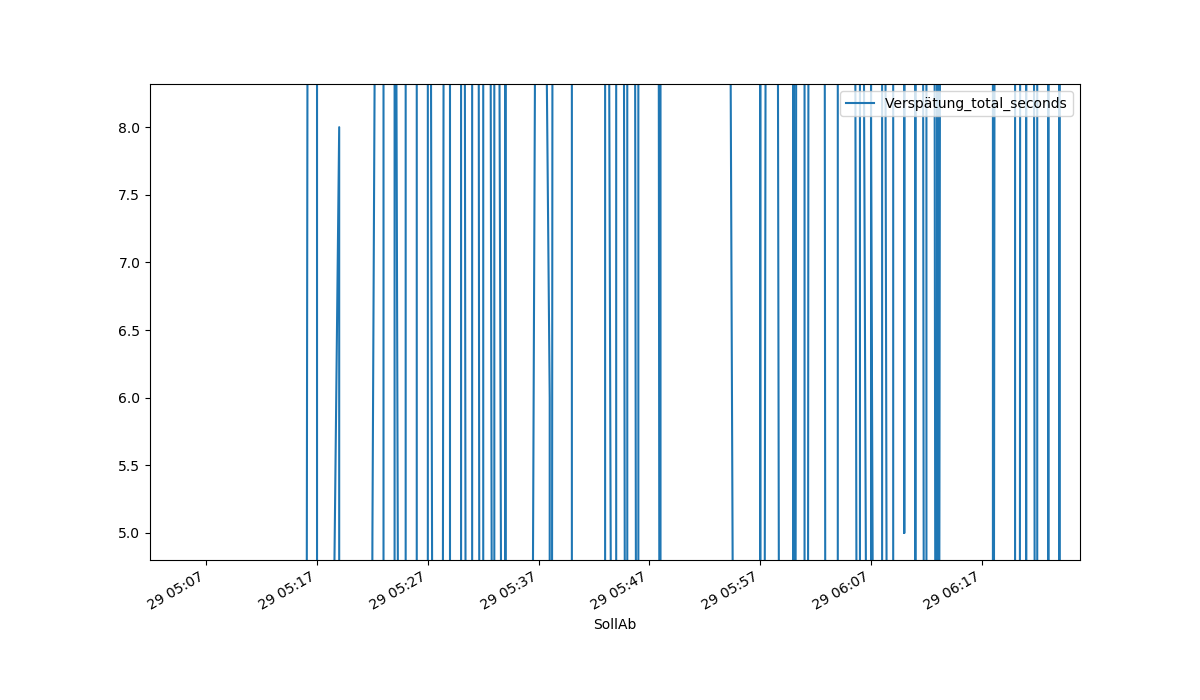

In [29]:
# Check that it works.
df_pre.plot(x='SollAb', y='Verspätung_total_seconds', figsize=(12, 7))

In [28]:
df_pre.to_pickle('df_preprocessed.pickle')